### Estimating Random Slope Models ###

The previous practical investigated country differences in hedonism after controlling for individuals' age, education and gender. 

Random Intercept models (as constructed in the last tutorial) assume that the relationship between hedonism and each of the independent variables is the same across countries. Is that actually true? Are there for example country differences in the relationship between hedonism and age? To address this question, we will need to fit a model which allows the relationship between hedonism and income to differ across countries: a random slopes model.

By the end of this session you will know,

    1) The appropriate R syntax to run an random slope model
    2) How to interpret random slopes in substantive terms
    3) How to calculate VPC measures in the presence of random slopes



The syntax below loads the R packages needed for this session.  These packages were all introduced in previous sessions, and details of them can be found in those notebooks.

In [3]:
library (foreign)
library (lme4)
library (lattice)

Loading required package: Matrix

Warning message:
“package ‘Matrix’ was built under R version 4.2.3”
Warning message:
“package ‘lattice’ was built under R version 4.2.3”


### The Dataset ###

The file "hedon_slopes.dta" is a modified version of the dataset used in the tutorial that introduced Random Intercept models.  
It contains the following variables:

    1) age -    Respondent's age in years 
    2) female - 0 if respondent male, 1 if respondent female 
    3) eduyrs - Number of years of education of respondent 
    
N.B in contrast to the dataset used in the Random Intercept none of the variables in this dataset have any missing data.  This ensures that all models will use identical samples, and hence allows Log Likelihood Ratio Tests to be used to compare model fit.  This does mean that the results of models which appear identical to those conducted in the previous session may yield slightly different results.

### Creating Variance Component and Random Intercept Models###

Using the command box below:-

    1) Import the "hedon_slopes.dta" into a dataframe.
    2) Run a Variance Component Model with the variable "hed" as the dependent variable - store this model in an object
    3) Center the continuous variables "age" and "eduyrs" on their respective grand means
    4) Run a Random Intercept Model with "hed" as the dependent variable, and a respondent's age, gender and experience of  education as independent variables.

In [4]:
hedon <- read.dta("hedon_slopes.dta")
summary(hedon)

#First, we are going to centre the continuous variables in the dataset.
meanage <- mean (hedon$age, na.rm=TRUE)
hedon$agecen = hedon$age-meanage

meanedu <- mean (hedon$eduyrs, na.rm=TRUE)
hedon$educen = hedon$eduyrs-meanedu

summary(hedon)

#Now, we have a VPC model which is only clustered by country. This does not include any independent variables
hedvc <- lmer (hed~(1|country), data = hedon, REML=FALSE)
summary (hedvc)

#Then we have the random intercepts model which has different intercepts for each country
hedri <- lmer (hed~agecen+educen+female+(1|country), data = hedon, REML=FALSE)
summary (hedri)

anova (hedvc,hedri)

        country          indiv            hed             eduyrs     
 Germany    : 2759   Min.   :    1   Min.   :-4.158   Min.   : 0.00  
 Greece     : 2447   1st Qu.: 9206   1st Qu.:-0.833   1st Qu.: 9.00  
 Netherlands: 2285   Median :18366   Median :-0.119   Median :12.00  
 Austria    : 2148   Mean   :18343   Mean   :-0.202   Mean   :11.92  
 Israel     : 2076   3rd Qu.:27508   3rd Qu.: 0.500   3rd Qu.:14.00  
 Switzerland: 1997   Max.   :36527   Max.   : 3.250   Max.   :40.00  
 (Other)    :22215                                                   
     female            age       
 Min.   :0.0000   Min.   :14.00  
 1st Qu.:0.0000   1st Qu.:32.00  
 Median :1.0000   Median :45.00  
 Mean   :0.5295   Mean   :46.09  
 3rd Qu.:1.0000   3rd Qu.:60.00  
 Max.   :1.0000   Max.   :98.00  
                                 

        country          indiv            hed             eduyrs     
 Germany    : 2759   Min.   :    1   Min.   :-4.158   Min.   : 0.00  
 Greece     : 2447   1st Qu.: 9206   1st Qu.:-0.833   1st Qu.: 9.00  
 Netherlands: 2285   Median :18366   Median :-0.119   Median :12.00  
 Austria    : 2148   Mean   :18343   Mean   :-0.202   Mean   :11.92  
 Israel     : 2076   3rd Qu.:27508   3rd Qu.: 0.500   3rd Qu.:14.00  
 Switzerland: 1997   Max.   :36527   Max.   : 3.250   Max.   :40.00  
 (Other)    :22215                                                   
     female            age            agecen           educen         
 Min.   :0.0000   Min.   :14.00   Min.   :-32.09   Min.   :-11.91856  
 1st Qu.:0.0000   1st Qu.:32.00   1st Qu.:-14.09   1st Qu.: -2.91856  
 Median :1.0000   Median :45.00   Median : -1.09   Median :  0.08144  
 Mean   :0.5295   Mean   :46.09   Mean   :  0.00   Mean   :  0.00000  
 3rd Qu.:1.0000   3rd Qu.:60.00   3rd Qu.: 13.91   3rd Qu.:  2.08144  
 Max.   :1.000

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: hed ~ (1 | country)
   Data: hedon

     AIC      BIC   logLik deviance df.resid 
 97648.8  97674.3 -48821.4  97642.8    35924 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1245 -0.6543  0.0730  0.7058  4.0672 

Random effects:
 Groups   Name        Variance Std.Dev.
 country  (Intercept) 0.08971  0.2995  
 Residual             0.88430  0.9404  
Number of obs: 35927, groups:  country, 20

Fixed effects:
            Estimate Std. Error t value
(Intercept) -0.20188    0.06717  -3.006

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: hed ~ agecen + educen + female + (1 | country)
   Data: hedon

     AIC      BIC   logLik deviance df.resid 
 93295.8  93346.7 -46641.9  93283.8    35921 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0975 -0.6501  0.0509  0.6863  4.8331 

Random effects:
 Groups   Name        Variance Std.Dev.
 country  (Intercept) 0.08936  0.2989  
 Residual             0.78321  0.8850  
Number of obs: 35927, groups:  country, 20

Fixed effects:
              Estimate Std. Error t value
(Intercept) -0.1439418  0.0671961  -2.142
agecen      -0.0176238  0.0002722 -64.749
educen      -0.0047613  0.0012950  -3.677
female      -0.1079247  0.0093840 -11.501

Correlation of Fixed Effects:
       (Intr) agecen educen
agecen  0.001              
educen -0.003  0.299       
female -0.074 -0.010  0.053

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hedvc,3,97648.80,97674.27,-48821.4,97642.80,NA,NA,NA
hedri,6,93295.81,93346.74,-46641.9,93283.81,4358.994,3,0


### Fitting and Interpreting a Random Slope Model  - Does the Impact of Gender Vary Betwen Countries?###

Consider the relationship between being female and hedonism (the random intercept model suggests a highly significant negative relationship - females are less hedonistic).  It's reasonable to ask if gender has an equal impact on hedonism in different countries.  

A random slope model provides a mechanism to answer such questions.

The command for running a multilevel model with education and age as fixed effects and gender as a random effect is shown below.  This syntax is essentially identical to the random intercept model with the exception that the 'female' variable appars twice in the equation (once as a fixed effect and once as a ransom effect varying by country).




In [4]:

#To run a random slopes model, we simply add a variable in front of the |country here
rs.gen <<- lmer (hed ~ agecen+educen+female+(1+female|country), data = hedon, REML=FALSE)
summary (rs.gen)
 ranef(rs.gen)







Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: hed ~ agecen + educen + female + (1 + female | country)
   Data: hedon

     AIC      BIC   logLik deviance df.resid 
 93191.5  93259.4 -46587.7  93175.5    35919 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1864 -0.6521  0.0513  0.6856  4.8424 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 country  (Intercept) 0.06507  0.2551       
          female      0.01126  0.1061   0.75
 Residual             0.78037  0.8834       
Number of obs: 35927, groups:  country, 20

Fixed effects:
              Estimate Std. Error t value
(Intercept) -0.1444640  0.0574564  -2.514
agecen      -0.0176276  0.0002717 -64.872
educen      -0.0049445  0.0012940  -3.821
female      -0.1068742  0.0255636  -4.181

Correlation of Fixed Effects:
       (Intr) agecen educen
agecen  0.001              
educen -0.004  0.298       
female  0.660 -0.004  0.019

$country
             (Intercept)       female
Austria     -0.018116037  0.036846555
Belgium      0.332227529  0.051819294
Switzerland  0.350368347  0.088116553
Czech       -0.296697676 -0.161041007
Germany      0.116795578 -0.068226207
Denmark      0.383132556  0.075808981
Spain       -0.172807690 -0.051265774
Finland     -0.073776490 -0.001618279
France       0.265903085  0.066336375
UK          -0.117073969 -0.043801349
Greece      -0.094612936 -0.073913687
Hungary      0.174737687  0.118290815
Ireland     -0.384561495 -0.012277455
Israel      -0.035870499  0.023897601
Netherlands  0.189553424  0.141116125
Norway      -0.144071257 -0.031386243
Poland      -0.639014458 -0.285538203
Portugal     0.004495018  0.020242844
Sweden       0.177376802  0.141250079
Slovenia    -0.017987520 -0.034657019

with conditional variances for “country” 

The output rom a random slope model contains the same broad ections as the random intercept model.  Output concerning the random slope appears in the "Random effects" section.

The first line of that section once again details variation in the random intercept (akin to the ransom effect in the random intercept model).  The second line labelled "female" concers the new random slope.  As was the case with the random intercept, the output provides an estimation of the variance in the relationship between gender and hedonism across countries, along with a standard deviation for that variation.  The column headed "Corr" provide a mesure of the correlation between a countris random intercept and the same countries random effect for gender.

In this case, there appears to be a strong positive correlation suggesting that a country which is towards the upper end of the distributions for interepts will also be relatively high up in the distribution of random effects for being female.

Given the fixed effect for female is negative, what does the correlation of random effects mean in terms of whetehr a country with a high intercept will have a larger, or smaller, gender difference?  What does this mean in sucstantie terms?

### Testing the Significance of Random Slopes ###

Once again, the log-likelihood ratio test can be used to establish if the addition of the random slope has improved the fit of the model (and hence offer evidence that the strenght of the relationship between gender and hedonism varies between countries).  In this case, the test is conducted by comparing the random slope model to the equivilent random intercept model, as shown in the command box below.

In this case, the random slope model involves two extra parameters (the variance in the slope, and the correlation of the slope with the intercept) so the critical value is taken from the chi-square distribution with two degrees of freedom.

The output of th command below indicates the random slope model is a substansial improvment in model fit compared to the random slope.  hence it can be argued that the impact of gender on hedonism does vary between countries.

In [5]:
anova (rs.gen, hedri)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hedri,6,93295.81,93346.74,-46641.90,93283.81,NA,NA,NA
rs.gen,8,93191.46,93259.38,-46587.73,93175.46,108.3436,2,2.974988e-24


### Does The Impact of Age on Hedonism Vary Between Countries? ###

Given the syntax explained above, it would seem reasonable to conclude that the command below will run a random slope model which allows the impact of age to vary between countries.

In [9]:
#Because age is not scaled, estimating random effects is very sifficult for the computer
rs.age <- lmer (hed~ agecen +(1+agecen|country), data = hedon, REML=FALSE)
summary (rs.age)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.798831 (tol = 0.002, component 1)”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model is nearly unidentifiable: very large eigenvalue
 - Rescale variables?”


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: hed ~ agecen + (1 + agecen | country)
   Data: hedon

     AIC      BIC   logLik deviance df.resid 
 93211.1  93262.0 -46599.5  93199.1    35921 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1492 -0.6494  0.0528  0.6819  4.9328 

Random effects:
 Groups   Name        Variance  Std.Dev. Corr
 country  (Intercept) 9.763e-02 0.312451     
          agecen      1.861e-05 0.004314 0.74
 Residual             7.805e-01 0.883441     
Number of obs: 35927, groups:  country, 20

Fixed effects:
            Estimate Std. Error t value
(Intercept) -0.20196    0.07003  -2.884
agecen      -0.01764    0.00100 -17.637

Correlation of Fixed Effects:
       (Intr)
agecen 0.708 
optimizer (nloptwrap) convergence code: 0 (OK)
Model failed to converge with max|grad| = 0.798831 (tol = 0.002, component 1)
Model is nearly unidentifiable: very large eigenvalue
 - Rescale variables?


However, while model output is provided, it should be noted that a warning message suggests that the model has failed to converge.  Furthermore, the variation in the effect of age would appear to be extremly small (note it is given as a number e-05).

Such a result may suggest that there is very little variation in the effect of age on hedonism between countries. Yet the provisional loglikelihood value for the model is -46547.5 compared to -46641.9 for the random intercept model.  A log-likelihood ratio test of these values would suggest that a model with a random effect for age is a better fit for the data than random intercept model.

Why might the variance of the random slopes on age to be very small?  Remember that the variance depends on the scale of x. Age is measured in years, with a standard deviation of 18.11 for this dataset. The slope for age measures the average increase in hedonism for an extra year of age and the variance of the slopes measures the difference in the increase in hedonism for an extra year of age for country j compared to the average increase in hedonism for an extra year of age in the whole dataset. The standard deviation of hed is only 0.98. When we compare this to the standard deviation of age we can see that we will expect the slopes to be small. On top of that, recall that variance is the square of standard deviation, and that when you square a number smaller than 1, the answer has twice as many zeros before the first non-zero number after the decimal point.

One way round this is to create a new variable equal to age/100. The smaller values of this variable should make the slopes correspondingly bigger and the variance should also increase. Centre the new variable and run the random slopes model with the new variable:


In [6]:
hedon$agesmall <-hedon$age/100
meanagesmall <- mean (hedon$agesmall, na.rm=TRUE)
hedon$agesmallcen = hedon$agesmall-meanagesmall

#So, now this is a model with age/100, this means our coefficient is multiplied by 100 so, we have to bear this in minds when we are interpretting it
rs.age2 <- lmer (hed~agesmallcen+educen+female+(1+agesmallcen|country), data = hedon, REML=FALSE)
summary (rs.age2)

#As comparison, we have a model that is only clustered by country
rs.age3 <- lmer (hed~agesmallcen+educen+female+(1|country), data = hedon, REML=FALSE)





anova(rs.age2, rs.age3)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: hed ~ agesmallcen + educen + female + (1 + agesmallcen | country)
   Data: hedon

     AIC      BIC   logLik deviance df.resid 
 93064.4  93132.3 -46524.2  93048.4    35919 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0997 -0.6482  0.0519  0.6809  4.9729 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 country  (Intercept) 0.09031  0.3005       
          agesmallcen 0.18545  0.4306   0.71
 Residual             0.77721  0.8816       
Number of obs: 35927, groups:  country, 20

Fixed effects:
             Estimate Std. Error t value
(Intercept) -0.143818   0.067549  -2.129
agesmallcen -1.789986   0.100178 -17.868
educen      -0.005394   0.001309  -4.120
female      -0.110118   0.009353 -11.774

Correlation of Fixed Effects:
            (Intr) agsmll educen
agesmallcen  0.683              
educen      -0.004  0.081       
female      -0.073 -0.002  0.052

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
rs.age3,6,93295.81,93346.74,-46641.90,93283.81,NA,NA,NA
rs.age2,8,93064.42,93132.33,-46524.21,93048.42,235.3855,2,7.703406e-52


Comparing the output for "rs.age2" (above) to the original model ("rs.age") shows that the transformation of the age variable has changed the overall model fit statistics.  Therefore, any log-liklihood ratio test intended to establish if the random slope on age substansially improves model fit will need to be taken against a random intercept modle which employs the same transformed age variable.

Run a random intercept model using the newly taransformed age variable.

Establish if the random slope for age substansially improves model fit.

What is the average impact of a one year increase in age on hedonism in the model rs.age2 (remember that the age variable has been rescaled)?

### Does the Impact of Eduction on Hedonism Vary Between Countries?###

Run an appropriate model to test if the effect of years of completed education on hedonism varies between countries.  

You should establish if the impact of education varies between countries.  

If so, how is the impact of education related to a countries intercept value?  

What substantive interpretation would you give to this model?


Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00258896 (tol = 0.002, component 1)”


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: hed ~ agesmallcen + educen + female + (1 + educen | country)
   Data: hedon

     AIC      BIC   logLik deviance df.resid 
   93186    93254   -46585    93170    35919 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1312 -0.6502  0.0502  0.6866  4.7936 

Random effects:
 Groups   Name        Variance  Std.Dev. Corr 
 country  (Intercept) 0.0886053 0.2977        
          educen      0.0001876 0.0137   -0.36
 Residual             0.7799526 0.8831        
Number of obs: 35927, groups:  country, 20

Fixed effects:
             Estimate Std. Error t value
(Intercept) -0.132307   0.066929  -1.977
agesmallcen -1.744947   0.027295 -63.929
educen      -0.005610   0.003346  -1.677
female      -0.108851   0.009377 -11.608

Correlation of Fixed Effects:
            (Intr) agsmll educen
agesmallcen  0.002              
educen      -0.326  0.111       
female      -0.074 -0.010  0.020
optimizer (nloptwrap) converge

$country
            (Intercept)        educen
Austria     -0.01100725  0.0023685101
Belgium      0.35324378 -0.0127166890
Switzerland  0.37359354 -0.0108500901
Czech       -0.38854732 -0.0046354594
Germany      0.08631959 -0.0140532265
Denmark      0.41125701  0.0004427605
Spain       -0.16557153  0.0293345423
Finland     -0.08643125  0.0012655924
France       0.29166716  0.0009044977
UK          -0.14838545 -0.0028274392
Greece      -0.15002127 -0.0005419716
Hungary      0.22277924 -0.0097773121
Ireland     -0.39778371 -0.0056198935
Israel      -0.02473415 -0.0093773869
Netherlands  0.27265137 -0.0174789240
Norway      -0.17003543  0.0002992696
Poland      -0.78769284  0.0177148781
Portugal     0.12241284  0.0278858201
Sweden       0.23706152 -0.0055883335
Slovenia    -0.04077586  0.0132508549

with conditional variances for “country” 

$country


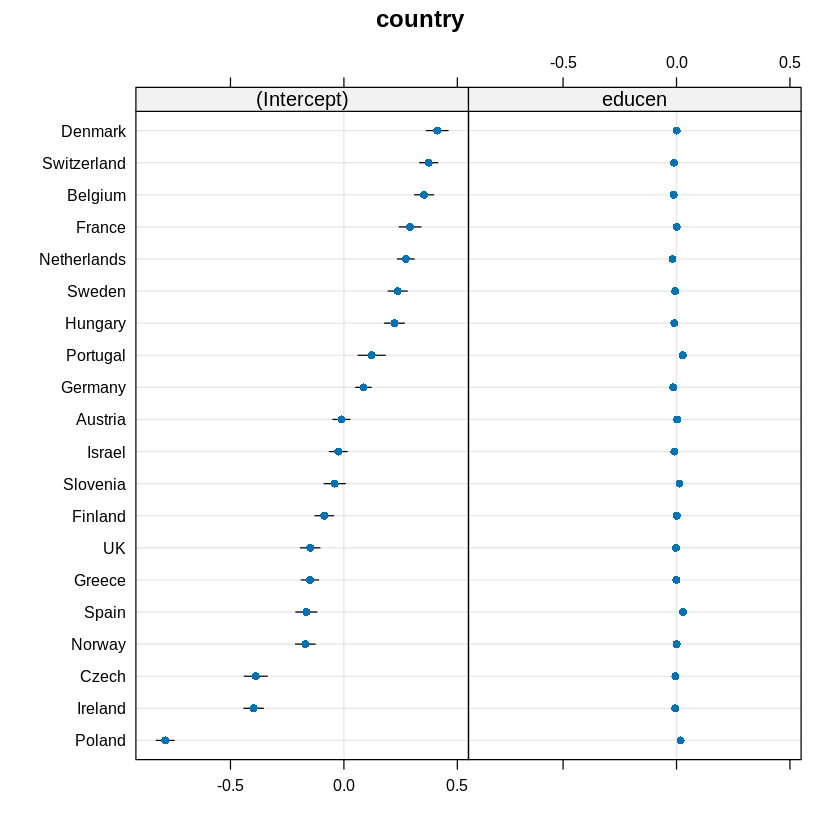

In [10]:
#The model below estimates the effect of education between countries
rs.ed <- lmer (hed~agesmallcen+educen+female+(1 + educen|country), data = hedon, REML=FALSE)
summary(rs.ed)

#The effect of an extra year of education between countries seems to very small
#Let's look at the individual random effects for each country
ranef(rs.ed)
dotplot(ranef(rs.ed))

#The effects between country seem to be really small

### Including More Than One Random Slope ###

Adding multiple random effects to a model is very simple in terms of the synatx required.  The additional random effects simply need to be added to the random part of the "lmer" command.  For instace, the command below runs a random slope model where the effects of both age and gender are llowed to vary between countries.

In [8]:
#The below model estimates random effects with 2 variables having a random component, namely age and gender.
rs.dual <<- lmer (hed~agesmallcen+educen+female+(1+agesmallcen+female|country), data = hedon, REML=FALSE)
summary (rs.dual)

ranef(rs.dual)
anova(rs.dual, rs.age2)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: hed ~ agesmallcen + educen + female + (1 + agesmallcen + female |  
    country)
   Data: hedon

     AIC      BIC   logLik deviance df.resid 
 92969.4  93062.8 -46473.7  92947.4    35916 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1889 -0.6484  0.0515  0.6817  4.9847 

Random effects:
 Groups   Name        Variance Std.Dev. Corr     
 country  (Intercept) 0.06670  0.2583            
          agesmallcen 0.17991  0.4242   0.71     
          female      0.01046  0.1023   0.76 0.56
 Residual             0.77457  0.8801            
Number of obs: 35927, groups:  country, 20

Fixed effects:
             Estimate Std. Error t value
(Intercept) -0.144605   0.058160  -2.486
agesmallcen -1.790460   0.098772 -18.127
educen      -0.005583   0.001308  -4.269
female      -0.108490   0.024760  -4.382

Correlation of Fixed Effects:
            (Intr) agsmll educen
agesmallcen  0.677              
educen      -0

$country
            (Intercept) agesmallcen        female
Austria     -0.01779580 -0.04307554  0.0375262747
Belgium      0.33868470  0.31904166  0.0511386797
Switzerland  0.34945365  0.61427509  0.0779967259
Czech       -0.28393819 -0.25307180 -0.1537403575
Germany      0.11826028  0.21445931 -0.0681500861
Denmark      0.38255027  0.27394297  0.0795021666
Spain       -0.16958342 -0.50576011 -0.0402841224
Finland     -0.08075450 -0.55662132  0.0005185673
France       0.26235067 -0.08755980  0.0681847323
UK          -0.11088408 -0.28047028 -0.0422290534
Greece      -0.09783979  0.36219056 -0.0808458863
Hungary      0.19016341  0.77582673  0.1023345273
Ireland     -0.38797392 -0.42273750 -0.0163531998
Israel      -0.02437151  0.21531472  0.0232764954
Netherlands  0.18796113  0.62885004  0.1306760664
Norway      -0.14501497 -0.47214642 -0.0280012546
Poland      -0.66255478 -0.59159760 -0.2775187235
Portugal     0.00309906 -0.08058844  0.0218840918
Sweden       0.17815482  0.16836456  0.13

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
rs.age2,8,93064.42,93132.33,-46524.21,93048.42,NA,NA,NA
rs.dual,11,92969.41,93062.79,-46473.70,92947.41,101.0152,3,9.401483e-22


The output for a random effects model with more than one random slope is essentially the same as for a model with a single random slope (as discussed above), with one exception.  There re now three correlations concerning random effects, and they are presented in a triangle.  

This table is best read one column at a time.  The first column provides correlations between the distribution of random intercepts and each random slope, i.e. there is a positive correlation of 0.71 between the distribution of random intercepts and the distribution of random slopes relating to age, and correlation of 0.76 between the distribution of intercepts and the distribution of random effects for the variable "female".

The second column of the table concerns correlations with the second random effect in the model (in this case age), so there is a positive correlation of 0.56 between the distribution of random effects for age and the distribution of random effects for gender.

Does the model including random effects for age and gender represent an improvment in model fit?

As above, the log-likelihood ratio test can answer this question.  However, there is an interesting question as to what the comparrison model should be.  Run log-liklihood ratio tests to compare model "rs.dual" to an equivilent random intercept model, and to an equivilent random slope model in which only age is a random effect.  What do these comparrisons tell you in substantive terms?

### Calculating the level-2 variance and the VPC ###

When calculating VPC in a random slope model, the formula changes to reflect all the points at which variation occurs in the model.  Hence the formula looks substansilly more complex than in the case of a VPC, or random intercept, model.

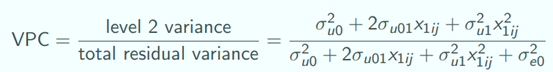

Consider the original random slope model (rs.gen) from earlier in this tutorial.

In [12]:
summary (rs.gen)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: hed ~ agecen + educen + female + (1 + female | country)
   Data: hedon

     AIC      BIC   logLik deviance df.resid 
 93191.5  93259.4 -46587.7  93175.5    35919 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1864 -0.6521  0.0513  0.6856  4.8424 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 country  (Intercept) 0.06507  0.2551       
          female      0.01126  0.1061   0.75
 Residual             0.78037  0.8834       
Number of obs: 35927, groups:  country, 20

Fixed effects:
              Estimate Std. Error t value
(Intercept) -0.1444640  0.0574564  -2.514
agecen      -0.0176276  0.0002717 -64.872
educen      -0.0049445  0.0012940  -3.821
female      -0.1068742  0.0255636  -4.181

Correlation of Fixed Effects:
       (Intr) agecen educen
agecen  0.001              
educen -0.004  0.298       
female  0.660 -0.004  0.019

In this case the total Level 2 variance is now 0.06507+0.01126 = 0.07633 (the variance in the intercept plus the variance in the effect of gender).

Total variance is 0.06507+0.01126+0.78037 = 0.8567 (both soures of level 2 variance plus the level 1 variance)

VPC = 0.07633/0.8567 = 0.0891 = 8.9%


### Plotting Residuals ###

In the previous tutorial the "ranef" command was employed to extract the values for each country in terms of their random inetrcept, while combining that command with "dotplot" produced a caterpillar plot of these random effects.

Both of these command generalise to multiple random effects in the case of a random slope model.

Looking back at the models run earlier in this session, which country is the most hedonistic after controlling for age, education and gender and allowing for the relationships between hedonism and age and gender to differ across countries? Draw an appropriate caterpillar plot to illustrate your answer. 

### Plotting Fixed and Random Effects ###

The syntax for producing caterpillar plots of random effects has been shown above (and in the tutorial on random intercept models).  However, it can also be useful to produce plots of the explanatory relationships uncovered by a model.  

The tutorial on single level models, shows how to plot predicted values to illustrate the coefficients within a model using the standard plotting commands provided within R.  Those comfortable with R may well find that they can expand that syntax to plot the relationships uncovered by random intercept and random slope models.  Several R packages are avalaible which can help simplify these processes - they provide "wrapper commands" which allow users to create complex graphs through single standardised commands.

The "effects" package https://cran.r-project.org/web/packages/effects/ is one example of such a package.  A second package is "sjPlot" https://cran.r-project.org/web/packages/sjPlot/.

Niether of these packages is pre-installed in the Noteable environment.  Therefore, if you wish to use one from within Noteable you will need to use the "install.packages ()" command prior to been able to call teh package with the "library ()" command.

For example, the command below installs the "sjPlot" package.  This may take several minutes to install.

In [12]:
install.packages ("sjPlot")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Once a package is installed, it needs to be loaded via the "library()" command as was the case with the libraries called at the start of this tutorial.

In [13]:
library ("sjPlot")

Learn more about sjPlot with 'browseVignettes("sjPlot")'.



The "plot_model" command is the main command in the "sjPlot" package and can be used to plot both fixed and random effects from models created using the "lme4" package.

The command below shows the basic syntax of the "plot_model" command, it plots the average effect of been female on hendomism, as estimated in the random intercept model, "hedri".

The first argument names the model that contains the relationship to be plotted, in this case "hedri" created earlier. 

"type="pred"" means that we want to plot the relationship as estimated by the model, i.e. the predicted (smoothed) relationship rather than the underlying data points.

The "terms" argument lists the explanatory variables to be included in defining the relationships to be plotted, in this case simply the variable "female".

Finally, "pred.type = c("fe")" tells R that we want to plot the fixed, average, effect for the chosen explanatory variable.

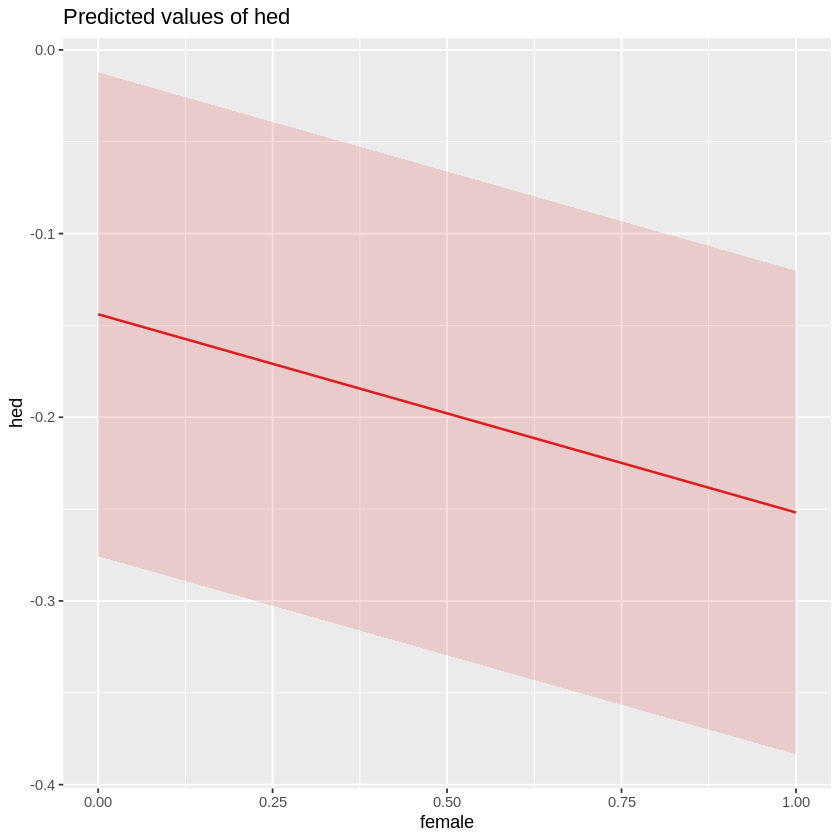

In [11]:
plot_model (hedri, type="pred", terms = c("female"), pred.type = c("fe")) 

Given "female" is a categorical variable, the above plot could be considered unneccsary (only the x-axis values of 0 and 1 are relevant).  However, it does illustarte the negative relationship suggested by the original model.  The shaded area represents the 95% confidence interval for the plotted relationship.

Recall that model, "hedri" is a random intercept model, hence while the effect of gender on hedonism is held constant across countries, different countries can have different intercepts and hence females/males in different countries will have, on average, different levels of hedonism.  This difference is not shown in the plot above.

The command below illustrates how to plot explanatory relationships from a random intercept, taking into account the different intercept values for the level 2 units (countries).

Once again, the "plot_model" command is used, and the basic setup is as above, passing the name of the model to be used and "type="pred"".  However, this time the "terms" argument includes not only the explanatory variable the plot is meant to include ("female"), but also the variable responsible for the random intercept that should be included ("country").  

Since the plot needs to account for random effects (in this case the random intercept), the "pred.type" argument is updated to read "re", telling R to include the random, as well as fixed, effects in the predicted values used to create the plot. 

Finally, the argument colors = "gs" is added to teh command.  This produces a grayscale plot. When graphing arndom effects, the plot will include a seperate line for each country (or more generally, each level 2 unit).  However, the majority of colour palettes avalaible in R contain only a handful of colours.  In the event that a model contains more level 2 units than there are colours in the colour palette chosen, only the first x number of units (equal to the number of colours in the colour palette) will be plotted.  Asking for a grey-scale graph will see R create a different tone of grey for each level 2 unit that needs to be plotted.  

This is generally acceptable, if the plot is to be used to illustrate a general pattern within the model, but it can be difficult to identify specific level 2 units, since teh different shades of grey can appear very similar.  Those interested in using colour palettes with a larger number of colours may wish to investigate the "colorRampPalette" command https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/colorRamp.html and associated "RColorBrewer" package https://cran.r-project.org/web/packages/RColorBrewer/index.html

NB. Confidence intervals are no longer displayed by default since they would likely overlap and lead to a messy, overly complex, graph.

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”


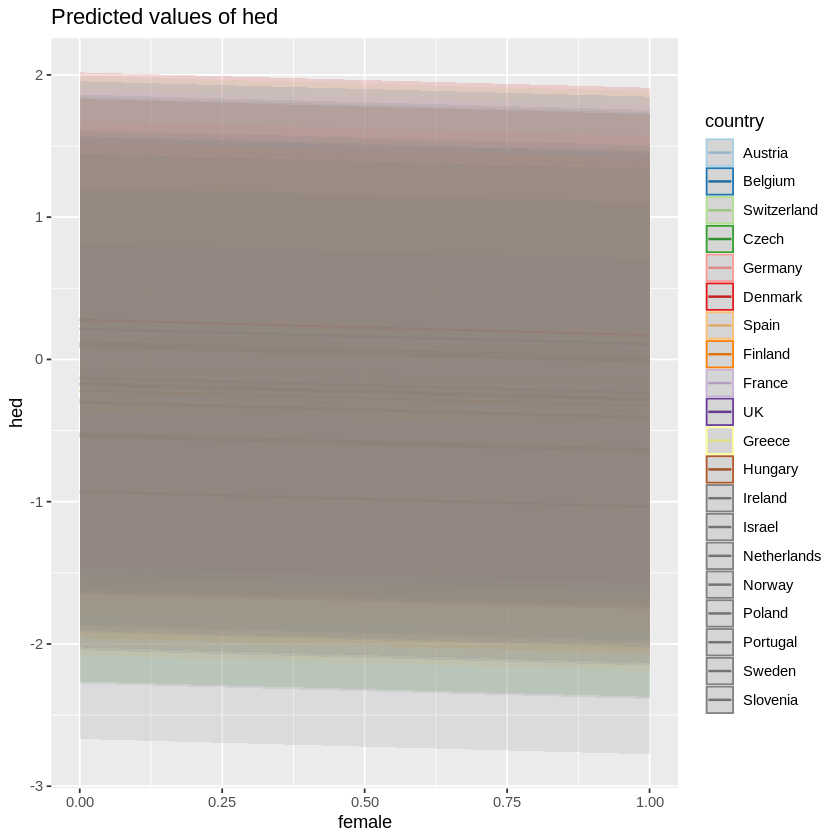

In [19]:
plot_model(hedri, type="pred", terms = c("female", "country"), pred.type = c("re"), colors = "Paired") 



Plotting a relationship from a random slope model requires indentical syntax to that used to create the fixed effect/random intercept model produced above.  The only difference is that the model passed to the "plot_model" command needs to be a random slope model.  For example, the command below plots the relationship between age (centered) and hedonism as estimated in the model "rs.age2", while taking account of both the relevant random intercepts and any variation in the imapct of age between countries.

Once again, the use of a grey-scale colour scheme can amke it difficult to pick out indivdual countries.  However, unless a country exhibits a truely unique relationship, the interpretation of such garphs is typically concerned with the overall shape of the graph (i.e. do the random slopes group togetehr, or fan out, as discussed in the lecture?).

$country
             (Intercept) agesmallcen
Austria      0.001342263 -0.04023185
Belgium      0.365500297  0.32299049
Switzerland  0.390899221  0.62666530
Czech       -0.362286174 -0.27324365
Germany      0.084852829  0.20570942
Denmark      0.423179713  0.26307437
Spain       -0.190889609 -0.50880483
Finland     -0.081104498 -0.55606877
France       0.300351413 -0.08772064
UK          -0.133404404 -0.27927860
Greece      -0.142325281  0.35067424
Hungary      0.242438929  0.79721190
Ireland     -0.400510398 -0.41946282
Israel      -0.012888114  0.21683199
Netherlands  0.258303801  0.65079868
Norway      -0.159023649 -0.47216502
Poland      -0.804757719 -0.61719041
Portugal     0.016077600 -0.07565168
Sweden       0.246692187  0.18110607
Slovenia    -0.042448407 -0.28524421

with conditional variances for “country” 

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”


ERROR: Error in ranef(rs.gen): object 'rs.gen' not found


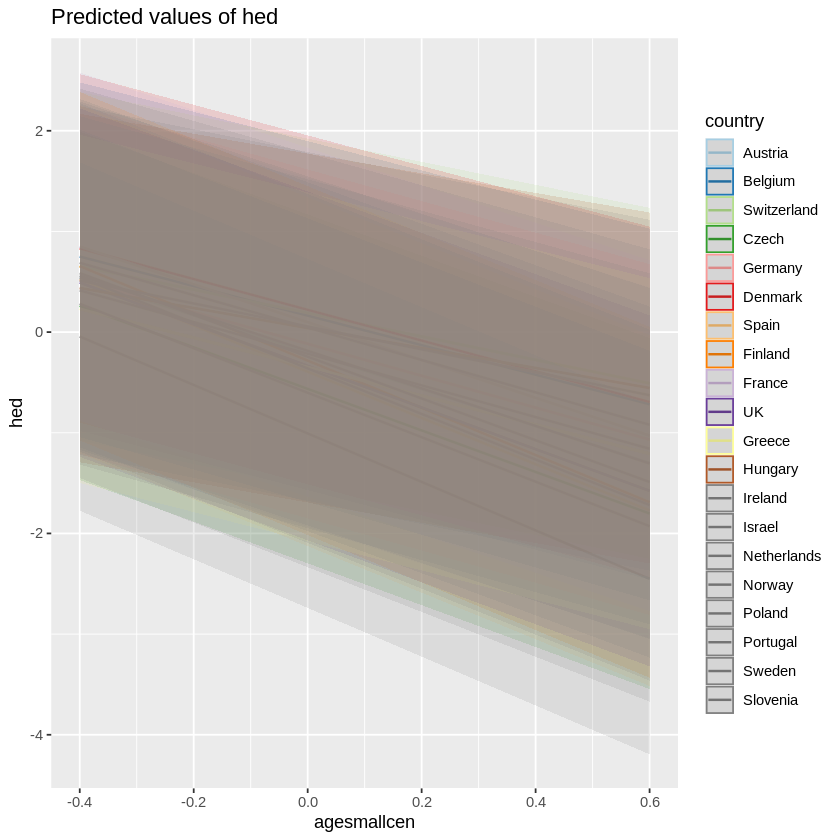

In [20]:
ranef(rs.age2)
plot_model (rs.age2, type="pred", terms = c("agesmallcen", "country"), pred.type = c("re"), colors = "Paired")

dotplot(ranef(rs.gen))

If time allows you might wish to try plotting some of the other relationships in the different models estimated earlier.

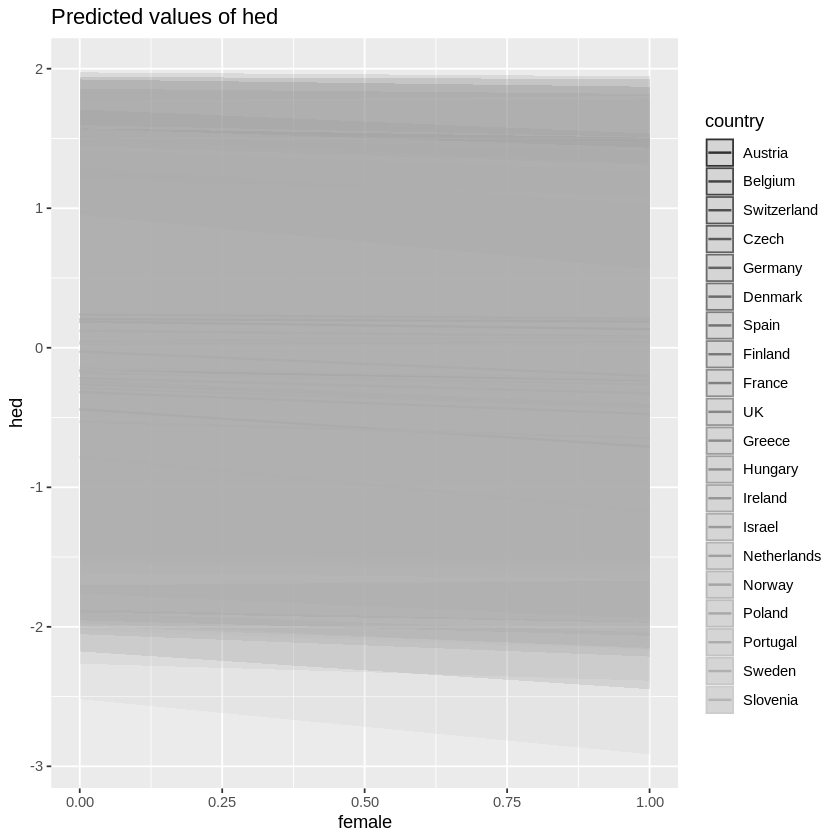

In [22]:
plot_model (rs.gen, type="pred", terms = c("female", "country"), pred.type = c("re"), colors = "gs") 